In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score ,recall_score,f1_score ,mean_squared_error


# Task 1

In [4]:
#Task 1: Read given data into DataFrame in python “Cat_Human.csv”. Perform Data cleaning.
data = pd.read_csv("Cat_human.csv")

data = data.loc[:, ~data.columns.duplicated()]
data = data.drop_duplicates()

data = data.dropna(axis=1, how = 'all')
data =data.dropna(axis = 0,how='all')
data

,Color,Eye_color,Height,Legs,Moustache,Tail,Weight,label
0,No,black,5.14,2,No,No,70.000000,human
1,No,brown,6.80,2,No,No,64.400000,human
2,Yes,brown,5.00,2,Yes,No,64.800000,human
3,No,blue,5.90,2,No,No,78.800000,human
4,No,blue,6.56,2,No,No,73.200000,human
...,...,...,...,...,...,...,...,...
195,brown,gray,1.14,4,Yes,Yes,2.304511,Cat
196,white,yellow,1.39,4,Yes,Yes,5.687970,Cat
197,white,black,0.53,4,Yes,Yes,6.364662,Cat
198,brown,green,1.03,4,Yes,Yes,6.590226,Cat


# Task 2

In [6]:
#Task 2: After data cleaning, you are required to prepare your dataset for training.
#• Separate features and labels.
#• Feature scaling/Normalization
#• Perform Label Encoding
#• Split dataset into training and testing data

label_encoder = LabelEncoder()

tail = data['Tail']
t = label_encoder.fit_transform(tail)
data['Tail'] = pd.Series(t)

color = data['Color']
c = label_encoder.fit_transform(color)
data['Color'] = pd.Series(c)


eyeColor = data['Eye_color']
eC = label_encoder.fit_transform(eyeColor)
data['Eye_color'] = pd.Series(eC)

mH = data['Moustache']
m = label_encoder.fit_transform(mH)
data['Moustache'] = pd.Series(m)



X = data[['Color','Eye_color','Height', 'Legs','Moustache', 'Weight']]
y = data['label']


#apply minmaxscaler to normalize feature

scaler =MinMaxScaler()
x_scaled= scaler.fit_transform(X)

#label encoder for string values
encoder = LabelEncoder()
y_encoded=encoder.fit_transform(y)

#split the data into x_train ,x_test ,y_train ,y_test
x_train ,x_test ,y_train ,y_test = train_test_split(x_scaled ,y_encoded  ,test_size = 0.2 ,random_state = 20 )


print('\n  X_train \n',x_train)
print('\n X_test \n',x_test)
print('\n y_train \n',y_train)
print('\n y_test\n',y_test)


  X_train 
 [[8.33333333e-01 6.00000000e-01 1.38888889e-01 1.00000000e+00
  1.00000000e+00 1.52086918e-02]
 [0.00000000e+00 2.00000000e-01 8.91975309e-01 0.00000000e+00
  0.00000000e+00 9.39317320e-01]
 [5.00000000e-01 2.00000000e-01 6.79012346e-02 1.00000000e+00
  1.00000000e+00 4.08733591e-02]
 [1.66666667e-01 4.00000000e-01 9.93827160e-01 0.00000000e+00
  1.00000000e+00 7.52212389e-01]
 [0.00000000e+00 4.00000000e-01 9.78395062e-01 0.00000000e+00
  0.00000000e+00 6.56131479e-01]
 [1.00000000e+00 0.00000000e+00 1.11111111e-01 1.00000000e+00
  1.00000000e+00 3.04173835e-02]
 [5.00000000e-01 0.00000000e+00 1.26543210e-01 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.33333333e-01 6.00000000e-01 2.31481481e-02 1.00000000e+00
  1.00000000e+00 7.60434588e-03]
 [6.66666667e-01 2.00000000e-01 7.71604938e-02 1.00000000e+00
  1.00000000e+00 3.80217294e-02]
 [8.33333333e-01 6.00000000e-01 8.79629630e-02 1.00000000e+00
  1.00000000e+00 4.46755321e-02]
 [1.66666667e-01 0.00000000e+00 9.691

# Task 3

Accuracy: 1.0
Confusion Matrix:
[[26  0]
 [ 0 14]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


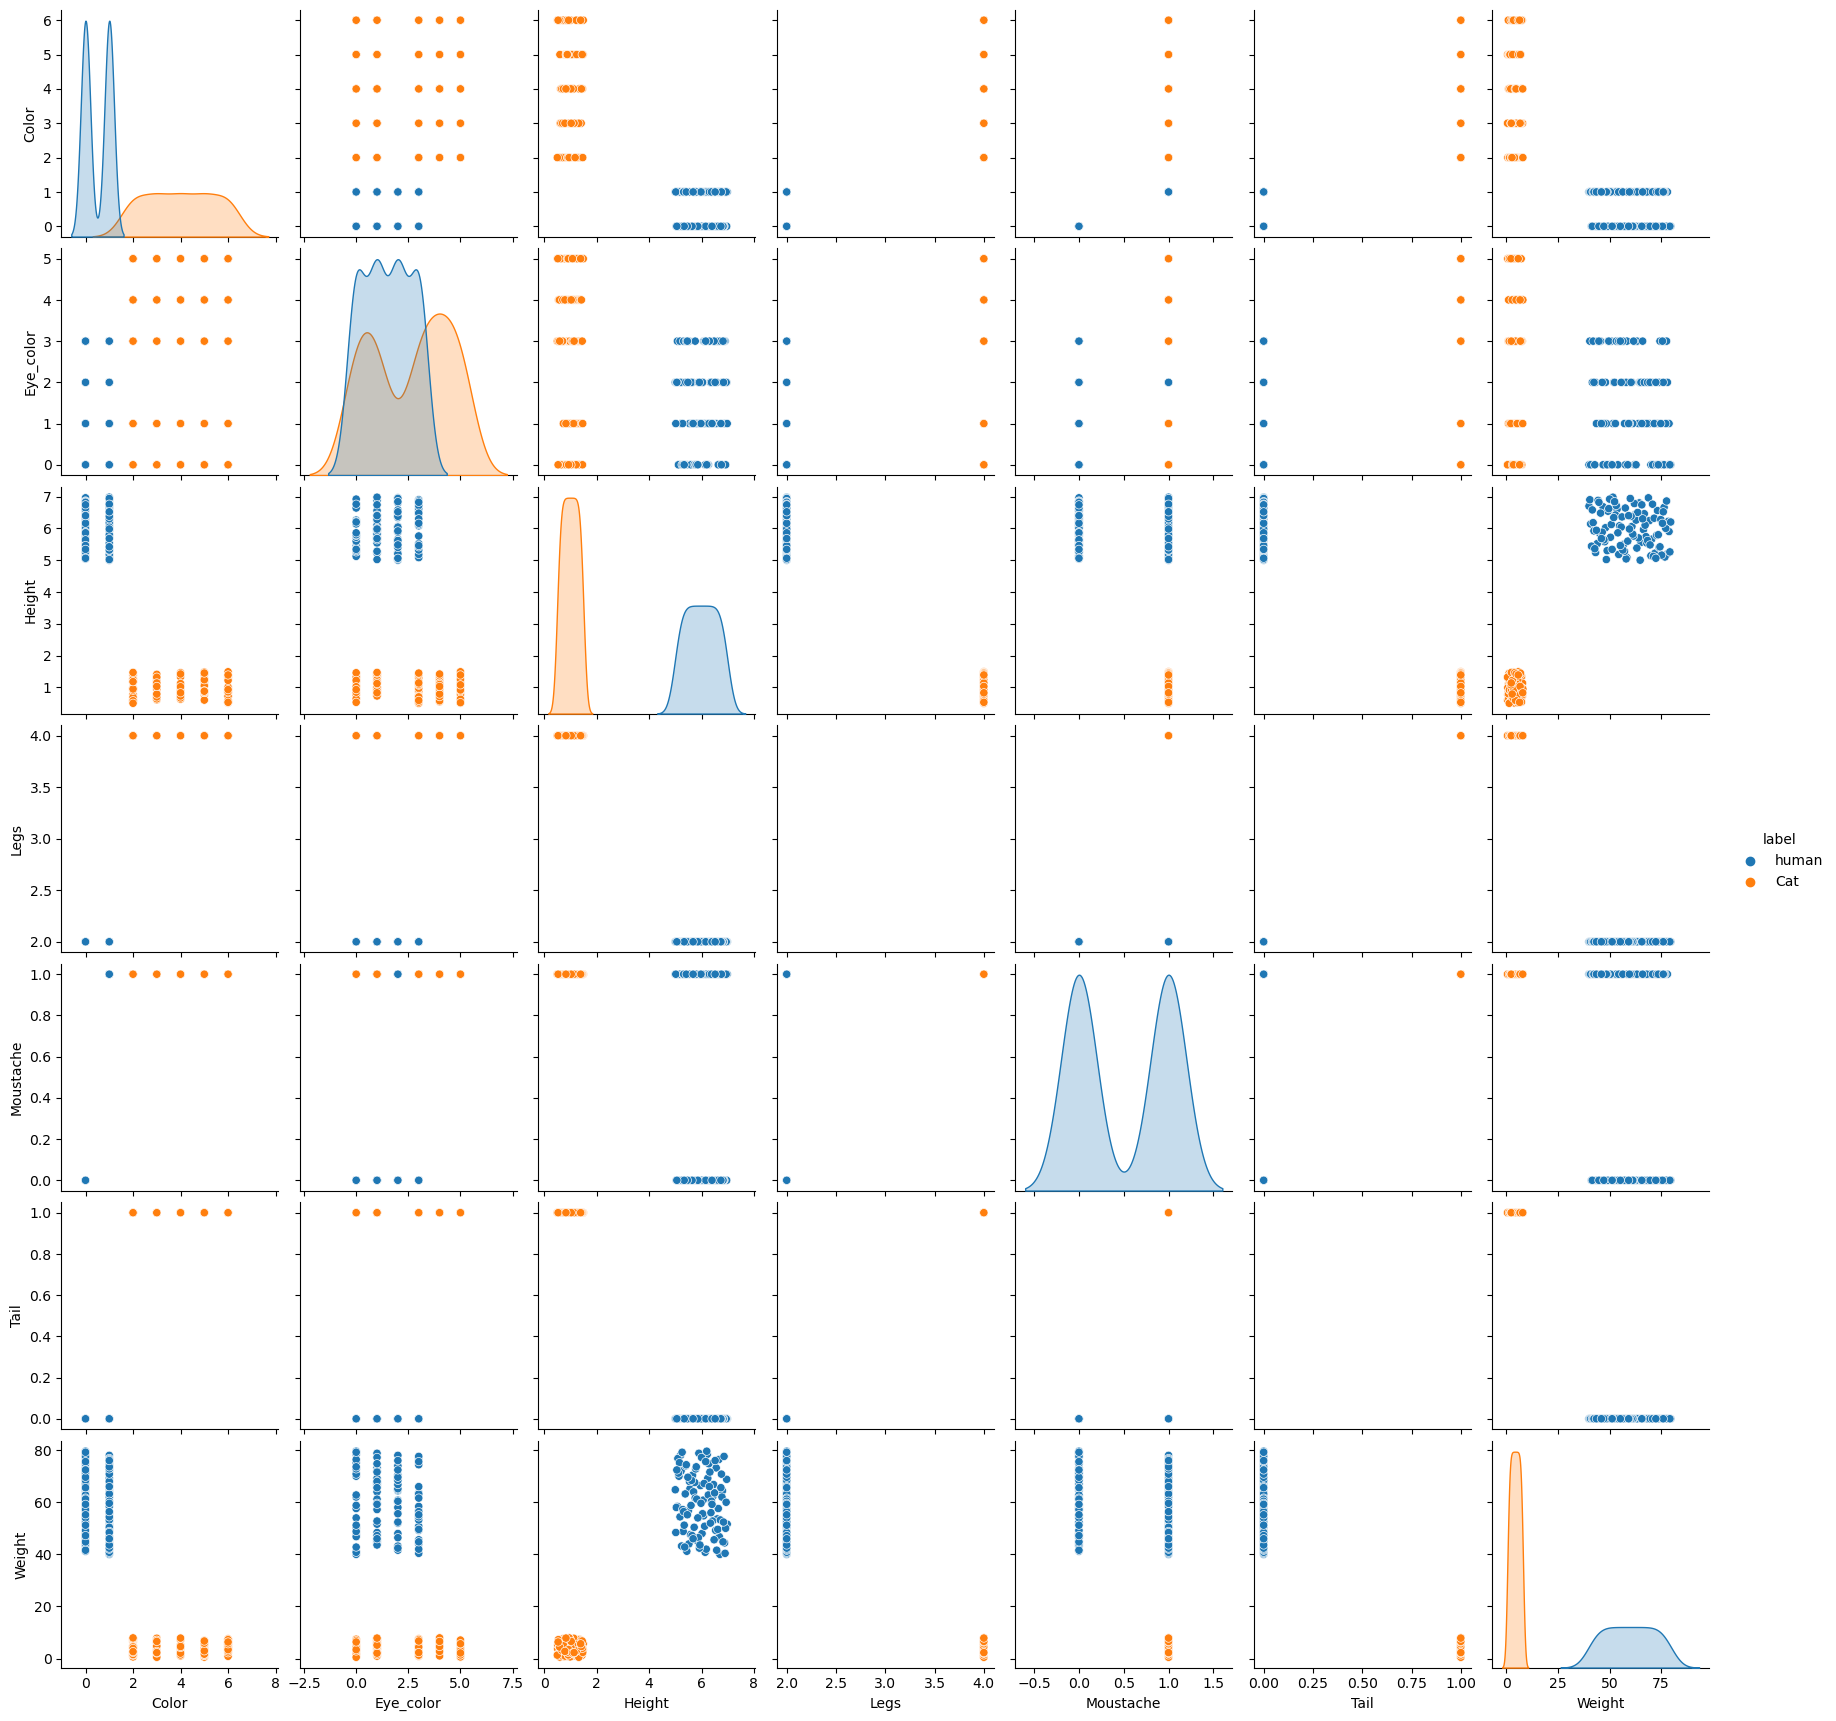

In [7]:
#Task 3: Display confusion matrix and generate report of f1-score, recall and precision.
#predict the label on the base of given input variable

#make a model which will take the data x_train and t_train
classification_model = LogisticRegression()
classification_model.fit(x_train, y_train)

# Predict test set
y_pred = classification_model.predict(x_test)

#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

#precision score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

#recall score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)


# Visualize the dataset
sns.pairplot(data, hue='label')
plt.show()
